In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler #To scale the data
from sklearn.model_selection import train_test_split #to split the data into train and test data set

import warnings
warnings.simplefilter("ignore")

# enable inline plots in the notebook
%matplotlib inline

In [3]:
income_data=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-9/Sprint-1/Practice/DS1_C9_S1_Practice_Income_Data.csv")
income_data

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [5]:
#Task1.1:
income_data.shape
income_data.info()
income_data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_Per_Week  32561 non-null  int64 
 11  Native_Country  32561 non-null  object
 12  Income_Bracket  32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


<bound method NDFrame.describe of        Age          WorkClass  Fnlwgt    Education       Marital_Status  \
0       39          State-gov   77516    Bachelors        Never-married   
1       50   Self-emp-not-inc   83311    Bachelors   Married-civ-spouse   
2       38            Private  215646      HS-grad             Divorced   
3       53            Private  234721         11th   Married-civ-spouse   
4       28            Private  338409    Bachelors   Married-civ-spouse   
...    ...                ...     ...          ...                  ...   
32556   27            Private  257302   Assoc-acdm   Married-civ-spouse   
32557   40            Private  154374      HS-grad   Married-civ-spouse   
32558   58            Private  151910      HS-grad              Widowed   
32559   22            Private  201490      HS-grad        Never-married   
32560   52       Self-emp-inc  287927      HS-grad   Married-civ-spouse   

               Occupation    Relationship   Gender  Capital_Gain 

In [7]:
#Task1.2:
#Identify categorical columns
categorical_columns = income_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

# Display the number of labels in each categorical column
for col in categorical_columns:
    print(f"\nNumber of unique labels in '{col}':")
    print(income_data[col].value_counts())

#Specifically count the number of males and females in the 'Gender' column
gender_counts = income_data['Gender'].value_counts()
print("\nCounts of Males and Females in 'Gender':")
print(gender_counts)

Categorical Columns: ['WorkClass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Gender', 'Native_Country', 'Income_Bracket']

Number of unique labels in 'WorkClass':
WorkClass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Number of unique labels in 'Education':
Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Number of unique labels in 'Marital_Status':
Marital_Status
Married-civ-spouse       14976
Never-married            1

In [9]:
# All columns
#Display all the columns
income_data_c=income_data
columns=income_data_c.columns
columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Capital_Gain', 'Capital_Loss',
       'Hours_Per_Week', 'Native_Country', 'Income_Bracket'],
      dtype='object')

In [11]:
#Task2:
#Check for missing values
missing_values = income_data_c.isnull().sum()
#replace "?" with Nan
income_data_c=income_data_c.replace(to_replace='?', value=np.nan)
#treating missing values
x = income_data_c["WorkClass"].mode()[0]
income_data_c["WorkClass"].fillna(x, inplace= True)

x = income_data_c["Occupation"].mode()[0]
income_data_c["Occupation"].fillna(x, inplace= True)

x = income_data_c["Native_Country"].mode()[0]
income_data_c["Native_Country"].fillna(x, inplace= True)

In [13]:
# Display the number of labels in each categorical column
for col in categorical_columns:
    print(f"\nNumber of unique labels in '{col}':")
    print(income_data_c[col].value_counts())


Number of unique labels in 'WorkClass':
WorkClass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Number of unique labels in 'Education':
Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Number of unique labels in 'Marital_Status':
Marital_Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-sp

In [15]:
#Task3.1:# Convert non-numeric labeled columns to categorical types
# Apply the conversion
for col in categorical_columns:
    income_data_c[col] = income_data_c[col].astype('category')

# Verify the conversion
print("Data types after conversion:")
print( income_data_c.dtypes)

Data types after conversion:
Age                  int64
WorkClass         category
Fnlwgt               int64
Education         category
Marital_Status    category
Occupation        category
Relationship      category
Gender            category
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country    category
Income_Bracket    category
dtype: object


In [17]:
#Task3.2:
# Initialize LabelEncoder
label_encoders= preprocessing.LabelEncoder()

# Apply label encoding
for col in categorical_columns:
    income_data_c[col] = le.fit_transform(income_data_c[col])
print(income_data_c[col].unique())

# Display the DataFrame after encoding
print("DataFrame after label encoding:")
print(income_data_c)

NameError: name 'le' is not defined

In [19]:
#Task3.3
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_income_data = income_data_c.select_dtypes(include= numerics)
    if scale == "minmax":
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_income_data.to_numpy()), columns = new_income_data.columns)
    return df_scaled

# scaling the data using MinMax Scaling process
scale = 'minmax' #standard (0,1), std scaler :(-1,1)
income_data_scaled=feature_scale(scale)
income_data_scaled

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week
0,0.301370,0.044302,0.021740,0.0,0.397959
1,0.452055,0.048238,0.000000,0.0,0.122449
2,0.287671,0.138113,0.000000,0.0,0.397959
3,0.493151,0.151068,0.000000,0.0,0.397959
4,0.150685,0.221488,0.000000,0.0,0.397959
...,...,...,...,...,...
32556,0.136986,0.166404,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.000000,0.0,0.193878


In [21]:
#task3.4:
# Finding correlation among numerical features, based on their strong relation we can choose the important features
#Independent variable : X1, X2, X3 all these columns are independent of each other.
#Dependent variable : X1,X2 and X3 are highly correlated with target column i.e. y

corr = income_data_scaled.corr()
corr.style.background_gradient(cmap = "coolwarm")

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week
Age,1.000000,-0.076646,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
Capital_Gain,0.077674,0.000432,1.000000,-0.031615,0.078409
Capital_Loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
Hours_Per_Week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [23]:
#Task4.1:
#splitting dataframe by row index
train_num = int(32561*0.7)
print(train_num)
income_data_train = income_data_c.iloc[:train_num,:]
income_dat_test = income_data_c.iloc[(train_num+1):,:]
print("shape of new dataframes-{}{}".format(income_data_train.shape,income_dat_test.shape))

22792
shape of new dataframes-(22792, 13)(9768, 13)


In [25]:
#Task4.2:
# Define features and target variable
X = income_data_c.drop('Income_Bracket', axis=1)  # Features
y = income_data_c['Income_Bracket']                # Target variable

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the sizes of the training and test sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Display the first few rows of each set for verification
print("\nTraining feature set:")
print(X_train.head())

print("\nTesting feature set:")
print(X_test.head())

Training set size: 22792
Testing set size: 9769

Training feature set:
       Age          WorkClass  Fnlwgt      Education       Marital_Status  \
19749   34   Self-emp-not-inc   56460        HS-grad   Married-civ-spouse   
1216    48   Self-emp-not-inc  243631   Some-college   Married-civ-spouse   
27962   23          State-gov   56402   Some-college   Married-civ-spouse   
23077   56          Local-gov  255406        HS-grad             Divorced   
10180   17            Private  297246           11th        Never-married   

             Occupation    Relationship   Gender  Capital_Gain  Capital_Loss  \
19749   Farming-fishing            Wife   Female             0          2179   
1216       Craft-repair         Husband     Male          7688             0   
27962    Prof-specialty         Husband     Male             0             0   
23077   Exec-managerial   Not-in-family   Female             0             0   
10180   Priv-house-serv       Own-child   Female             0    

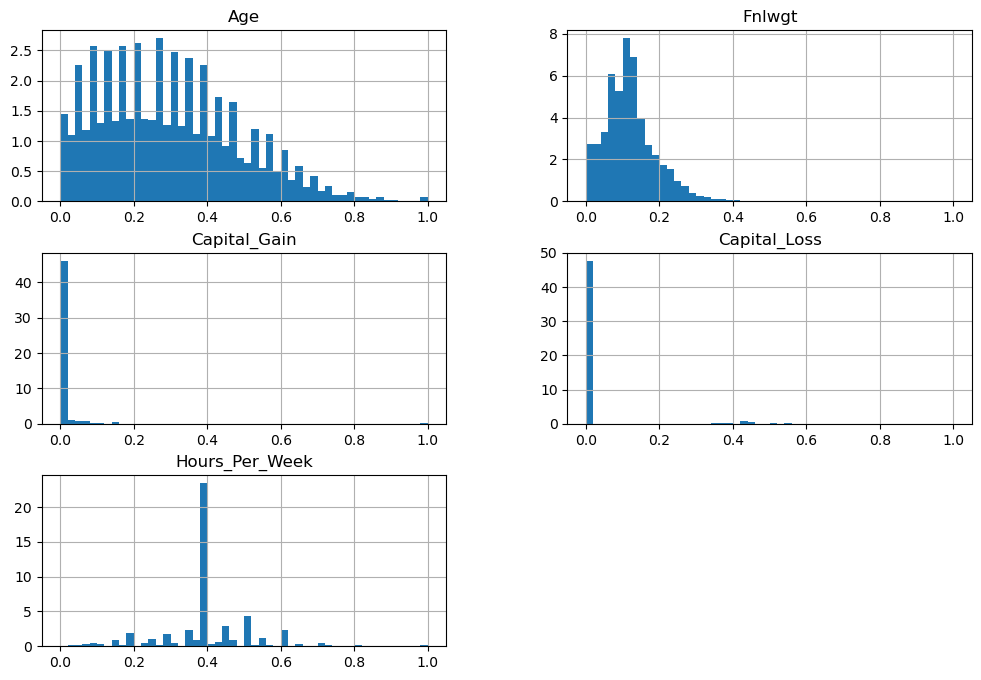

In [27]:
#Task5:
# Histogram of all Numerical features
income_data_scaled.hist(figsize = (12,8), bins = 50, density = True)
plt.show()

Index(['WorkClass', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Gender', 'Native_Country', 'Income_Bracket'],
      dtype='object')


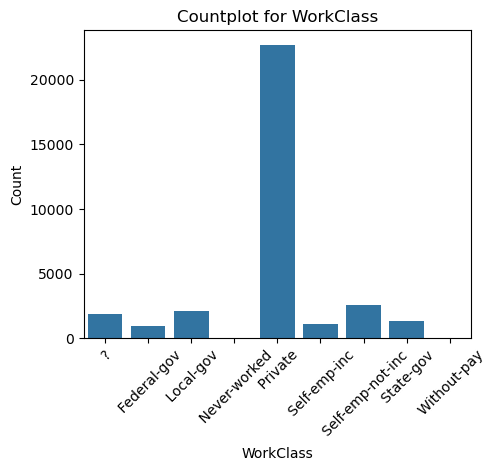

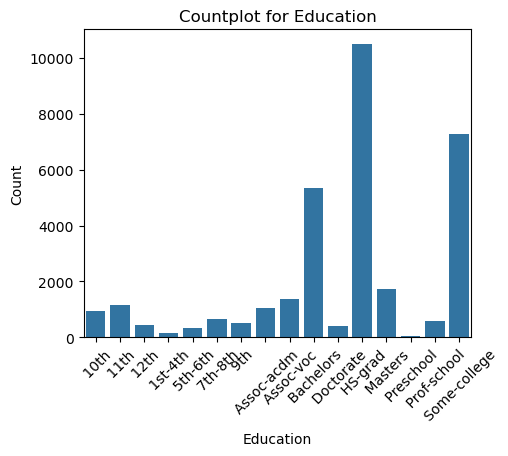

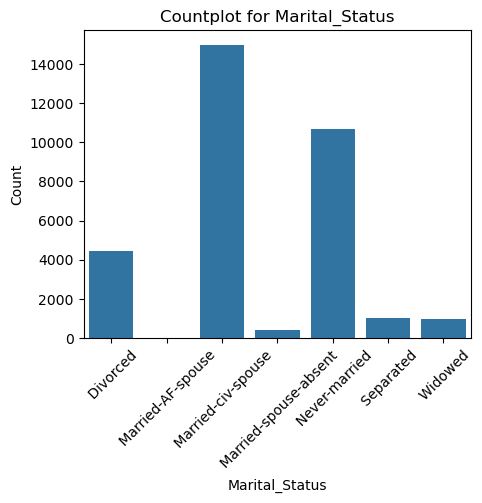

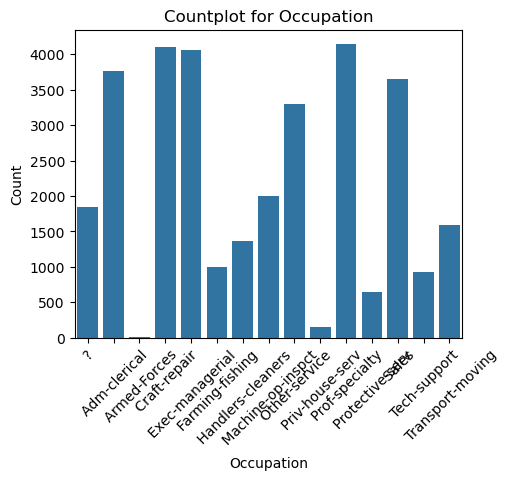

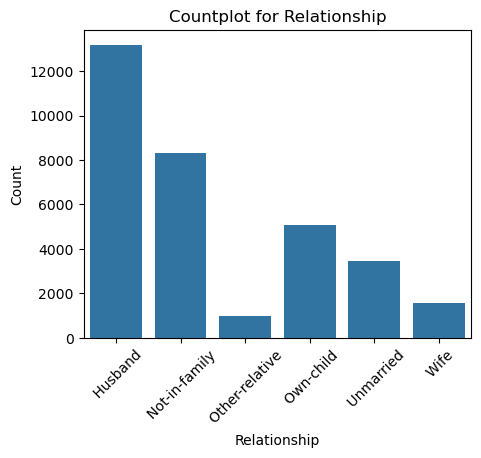

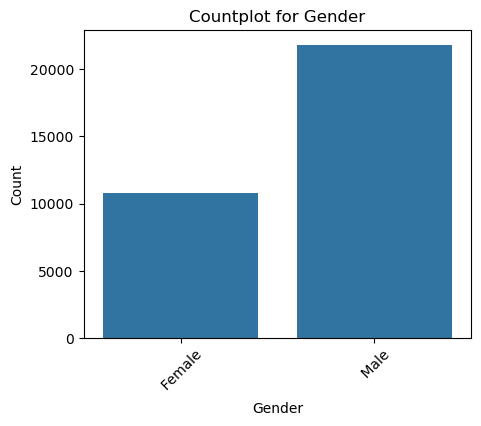

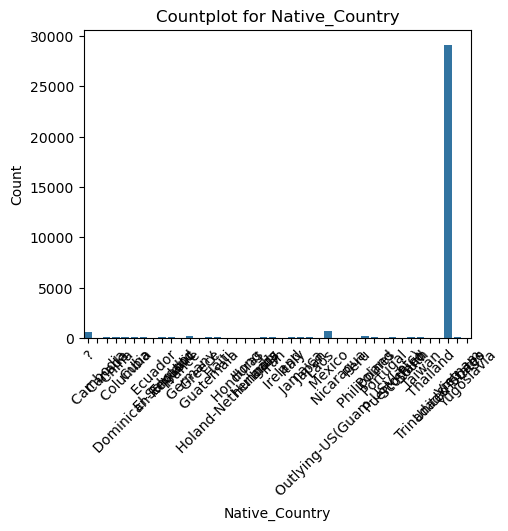

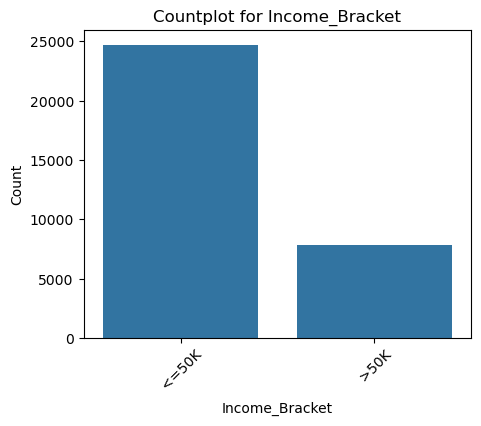

In [29]:
# Histogram of all Categorical features
cat_income_data = income_data_c.select_dtypes('category')
categorical_cols=cat_income_data.columns
print(categorical_cols)
for col in categorical_cols:
    plt.figure(figsize = (5,4))
    sns.countplot(x=col, data=cat_income_data)
    plt.title(f'Countplot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

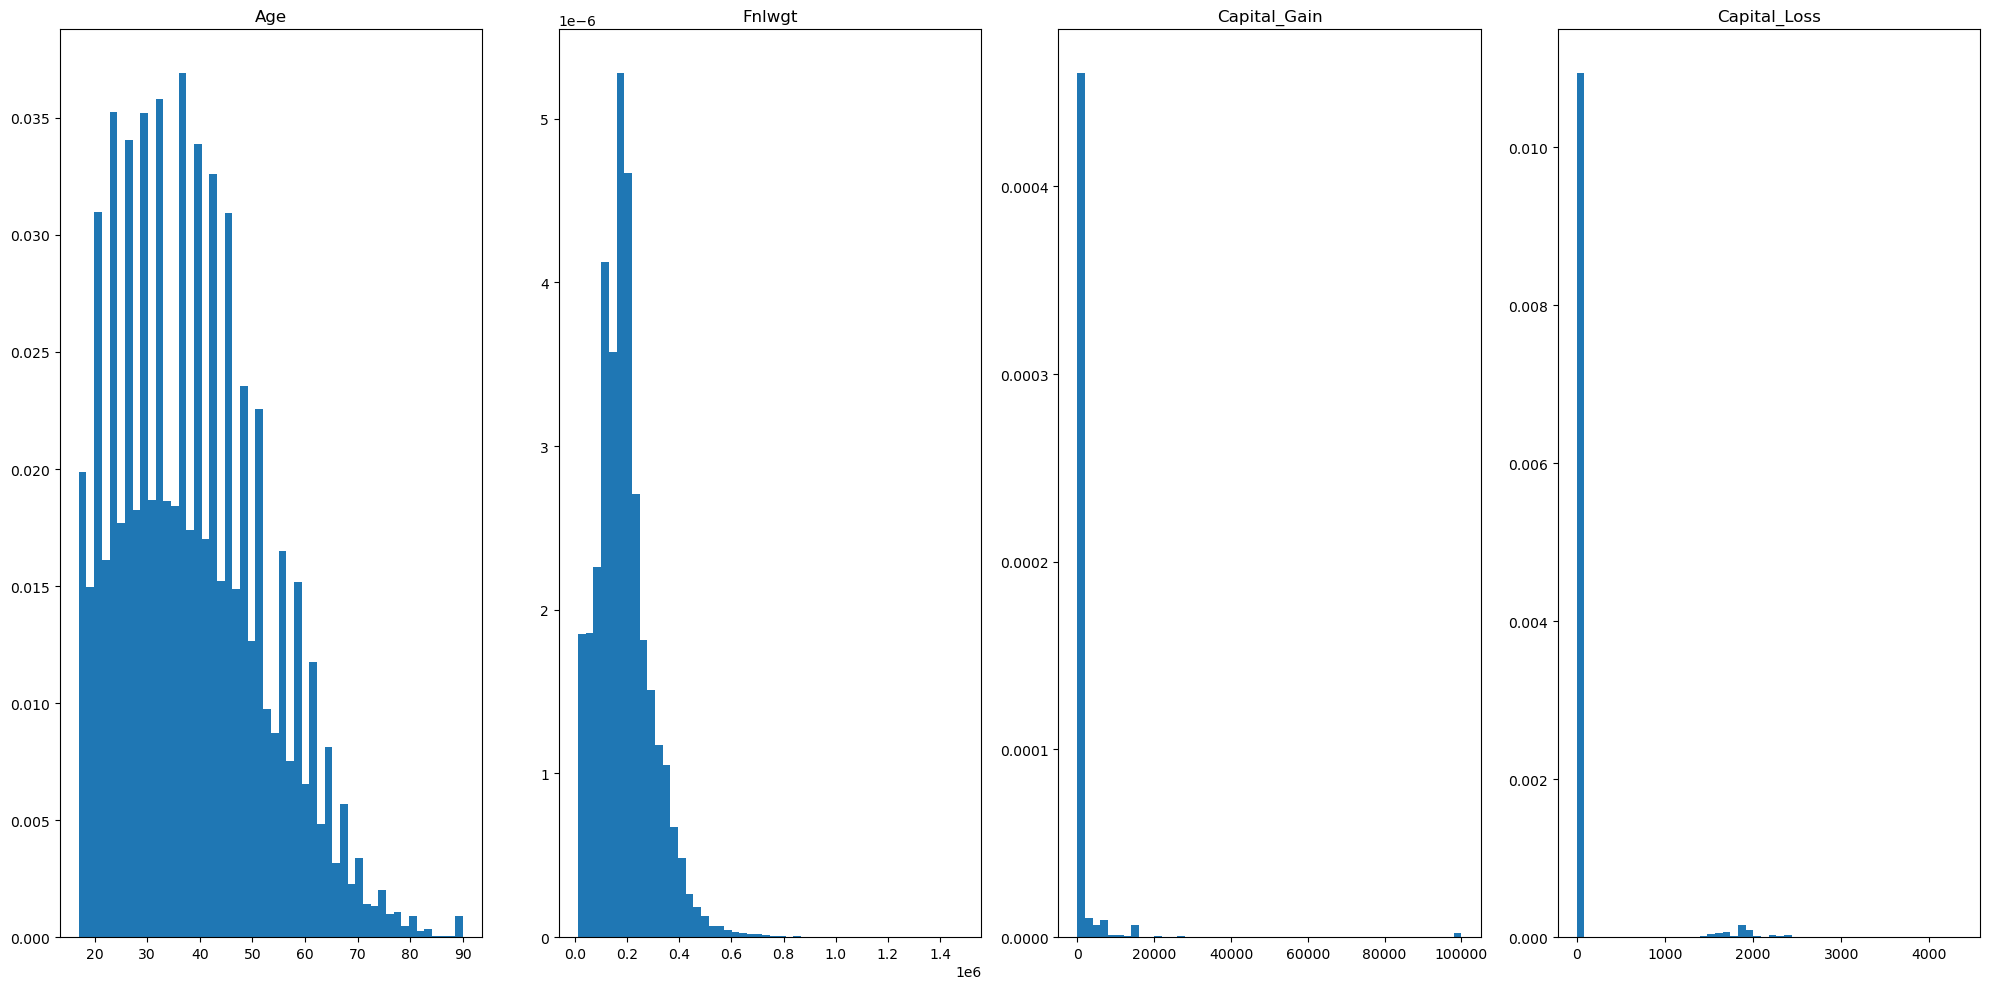

In [31]:
# Histogram of all numerical features

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_income_data = income_data_c.select_dtypes(include=numerics)
numeric_cols=new_income_data.columns
num_cols=4
n_bins = 50

# compute number of rows for plot
num_rows= int(len(numeric_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_income_data[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

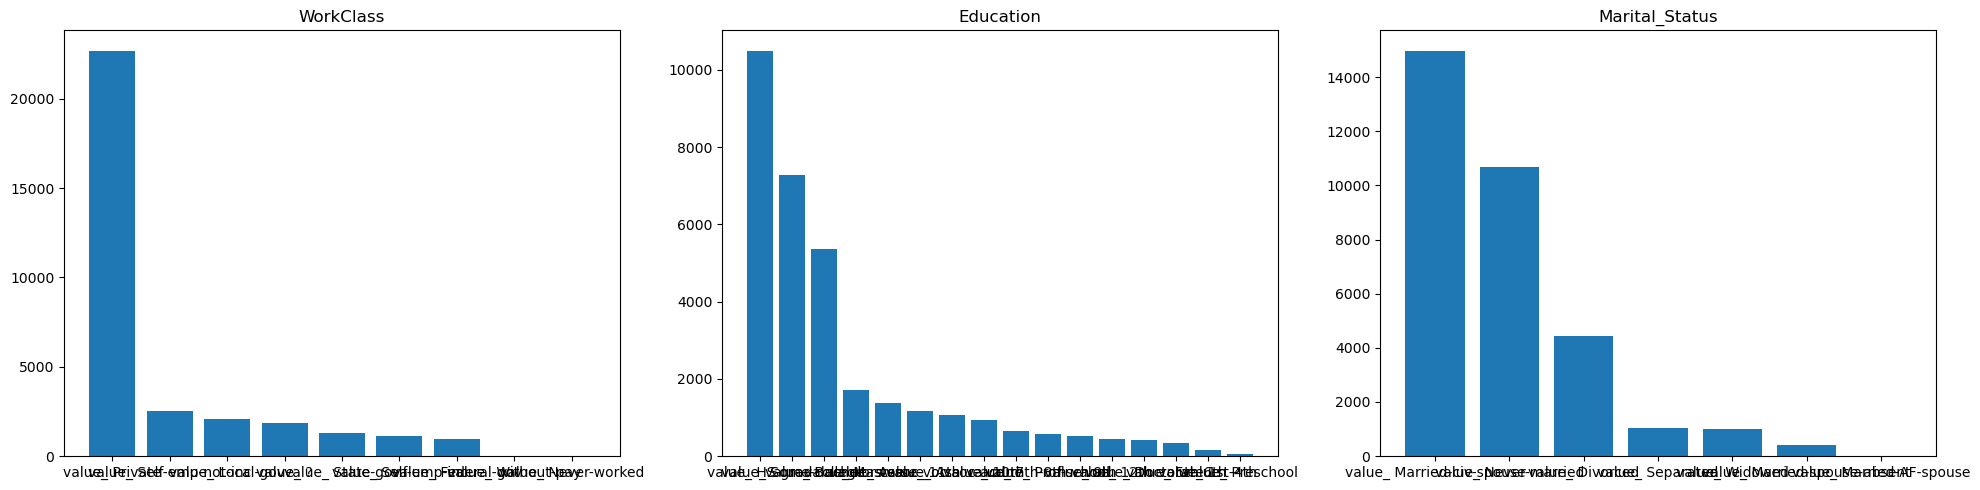

In [33]:
# Histogram of all categorical features
num_cols = 3
cat_income_data = income_data_c.select_dtypes('category')
categorical_cols=cat_income_data.columns
# compute number of rows for plot
#num_rows= int(len(categorical_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(1, num_cols, tight_layout=True,figsize=(20,5))

# plotting the numerical columns
for col, ax in zip(categorical_cols,axs.flatten()[:len(categorical_cols)]):
    stats = cat_income_data[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join(('value_',str(x))),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)

plt.show()

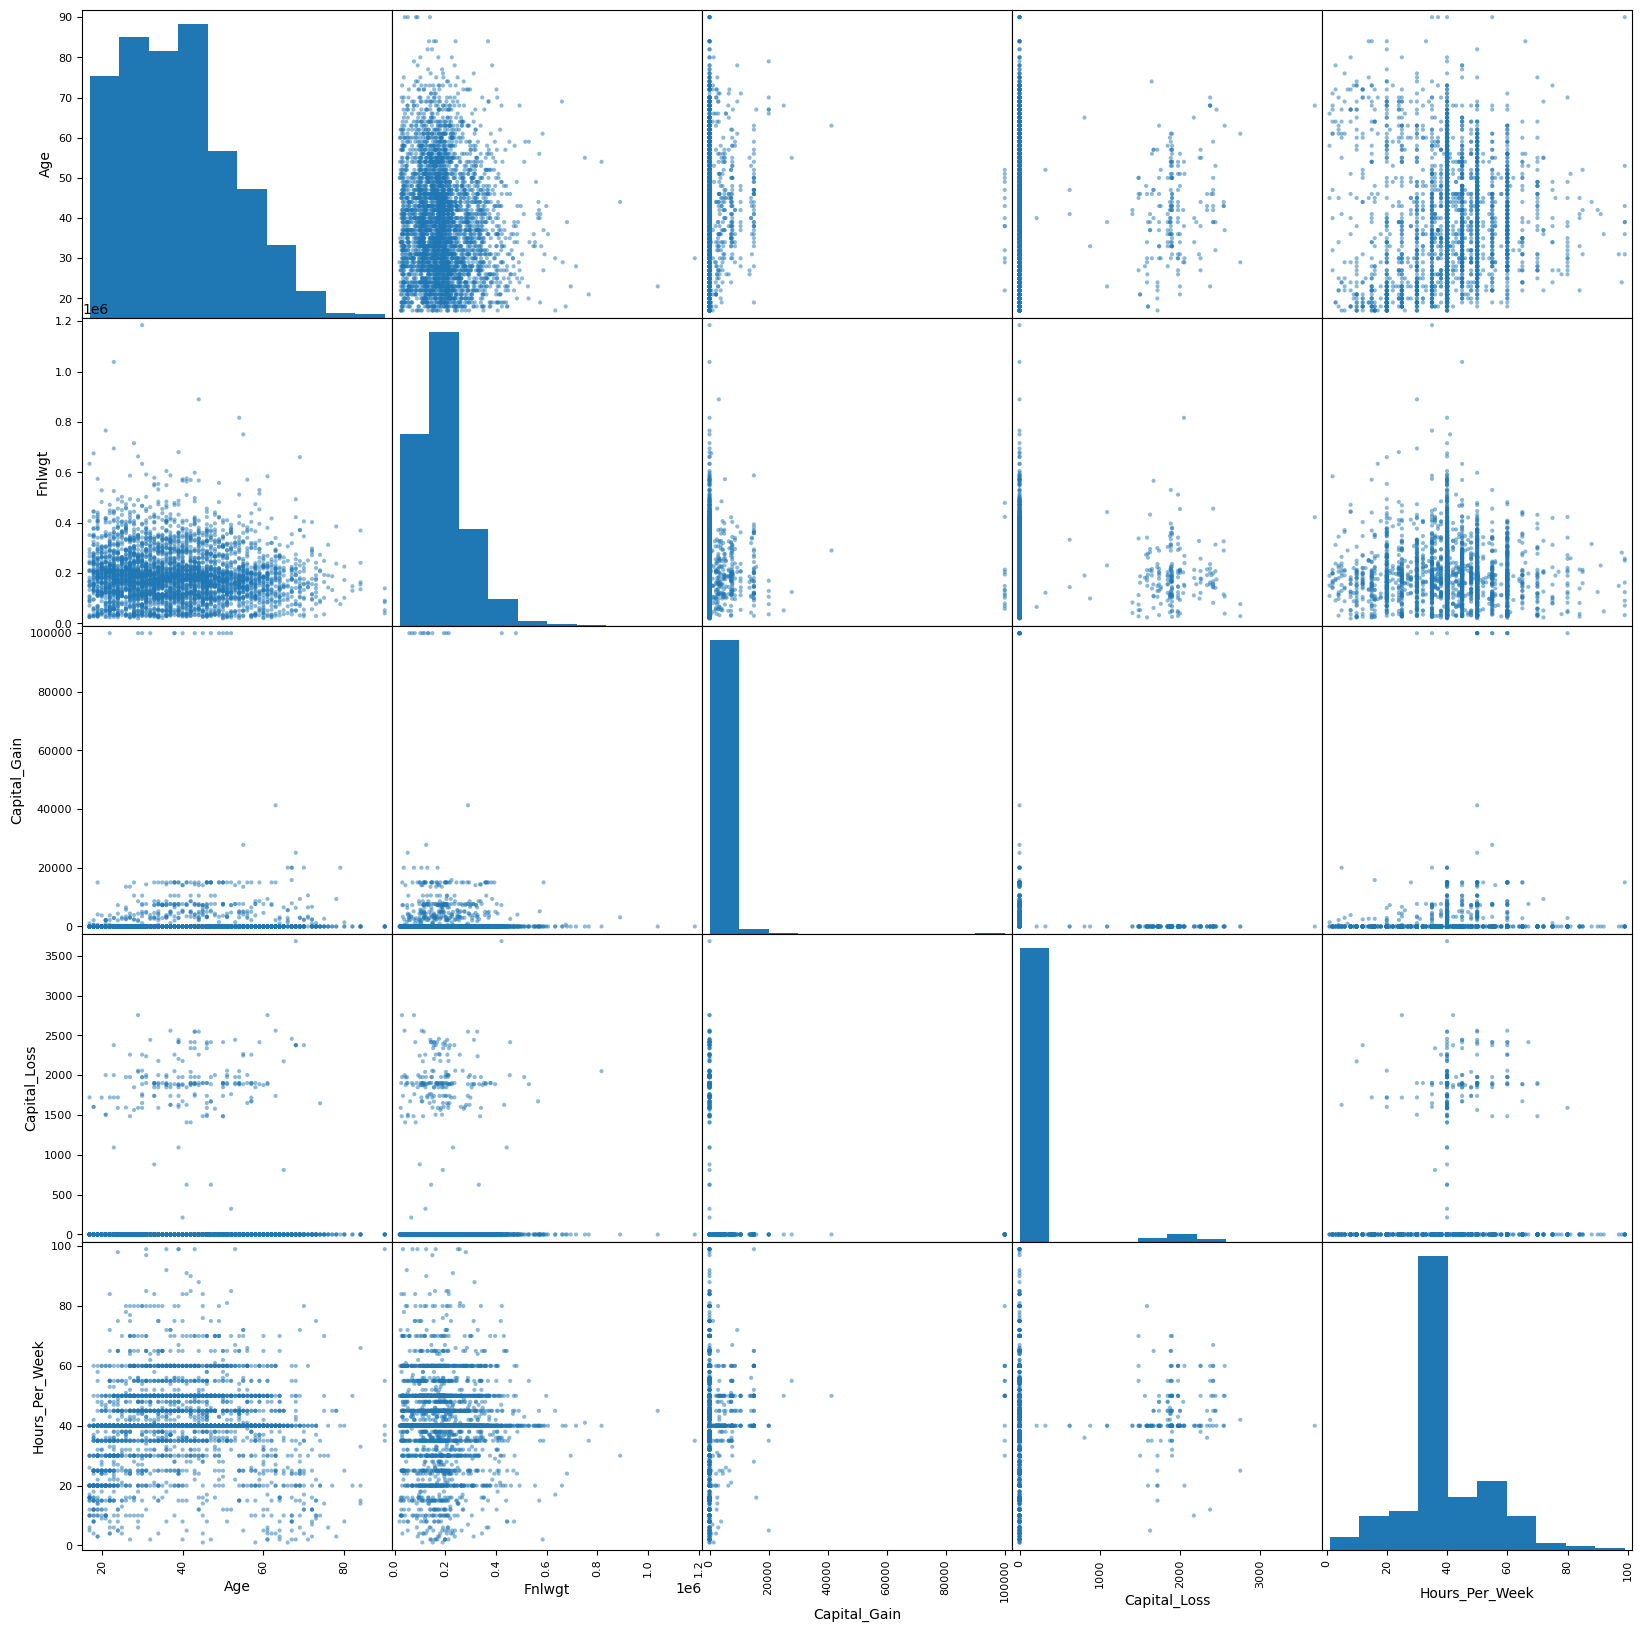

In [35]:
# Scatter Matrix plot of all columns

pd.plotting.scatter_matrix(income_data_c[numeric_cols].sample(4000),figsize=(20,20))
plt.show()